In [1]:
# libraries for numerical
import pandas as pd
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# to plot the diagrams within the cells
%matplotlib inline

In [2]:
# Load the kc housing dataset
df = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.drop('date', axis=1, inplace=True)

In [7]:
df.drop('id', axis=1, inplace=True)

In [9]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396058,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [12]:
from sklearn import preprocessing

In [15]:
scaler = preprocessing.MinMaxScaler()
col = df.drop('price', axis = 1).columns[:]

x = df.loc[:, col]
y = df['price']

x = pd.DataFrame(data = scaler.fit_transform(x), columns=col)

x.head(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513


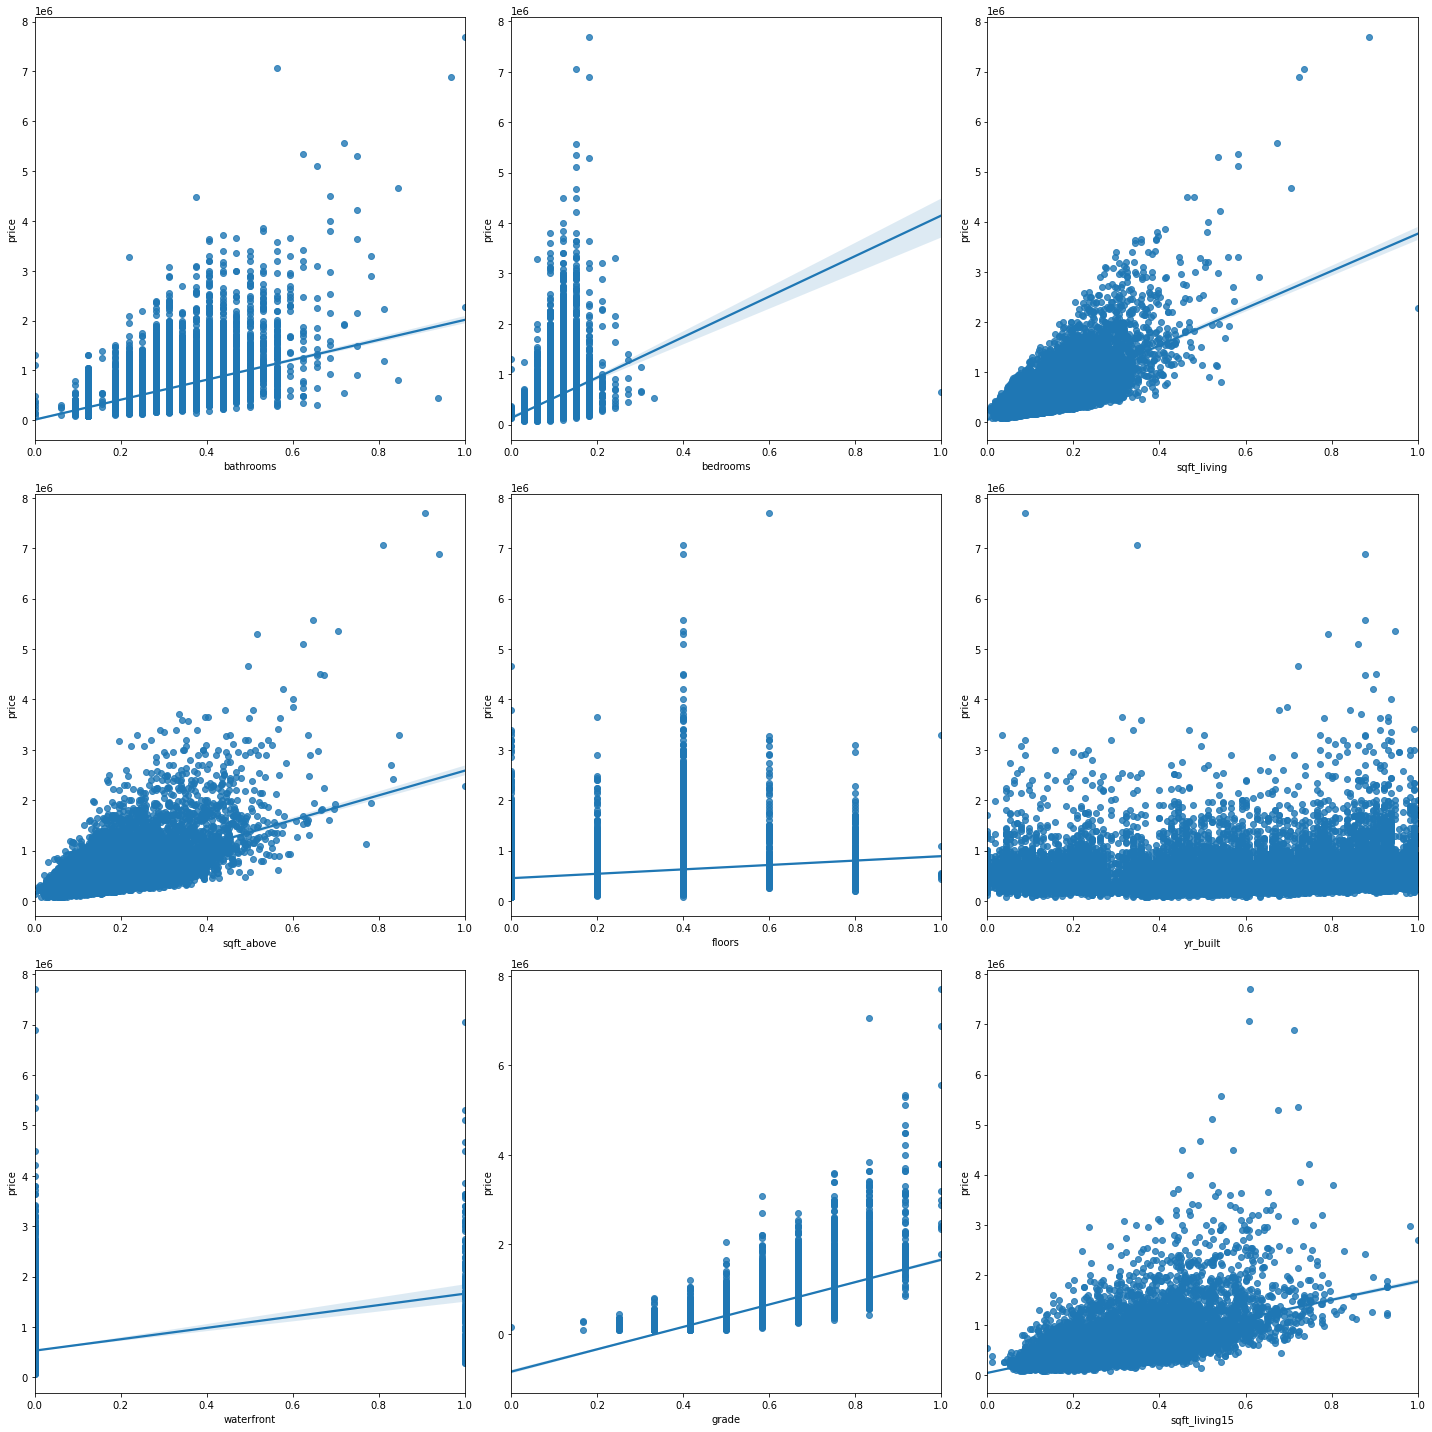

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (20, 20))
sns.regplot(y=df['price'], x=x['bathrooms'], ax=axs[0,0])
sns.regplot(y=df['price'], x=x['bedrooms'], ax=axs[0,1])
sns.regplot(y=df['price'], x=x['sqft_living'], ax=axs[0,2])
sns.regplot(y=df['price'], x=x['sqft_above'], ax=axs[1,0])
sns.regplot(y=df['price'], x=x['floors'], ax=axs[1,1])
sns.regplot(y=df['price'], x=x['yr_built'], ax=axs[1,2])
sns.regplot(y=df['price'], x=x['waterfront'], ax=axs[2,0])
sns.regplot(y=df['price'], x=x['grade'], ax=axs[2,1])
sns.regplot(y=df['price'], x=x['sqft_living15'], ax=axs[2,2])
plt.tight_layout()

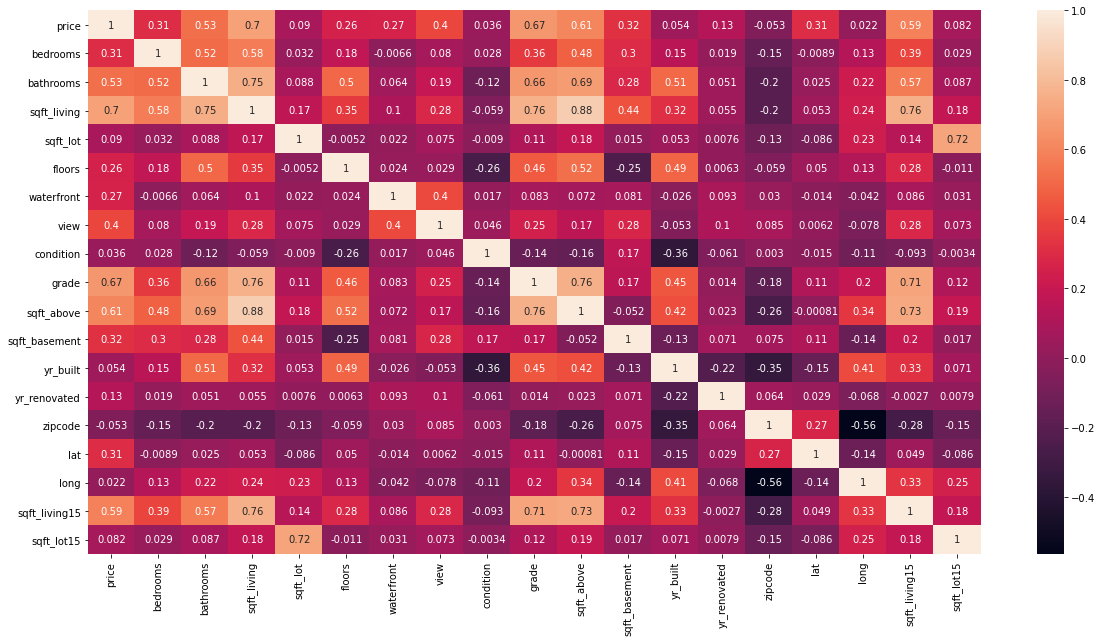

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [19]:
# spliting using train_test_split
x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (17290, 18)
y_train shape: (17290,)
x_test shape: (4323, 18)
y_test shape: (4323,)


In [20]:
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)


LinearRegression(normalize=True)

In [23]:
print('Model intercept : ', model.intercept_, "\n")
print('Model coefficient : ', model.coef_, "\n")

for i in range(len(x.columns)):
    print(x.columns[i], ": ", model.coef_[i])


Model intercept :  6674106.0682752635 

Model coefficient :  [-3.44011110e+04  4.45891555e+04 -2.60860101e+03  8.86087935e-02
  6.99216956e+03  5.62587834e+05  5.36920296e+04  2.45188302e+04
  9.46551999e+04  2.78781499e+03  2.75684642e+03 -2.68332510e+03
  2.04036080e+01 -5.52799806e+02  5.96050074e+05 -1.94781180e+05
  2.11672648e+01 -3.26005919e-01] 

bedrooms :  -34401.110966347194
bathrooms :  44589.15546237503
sqft_living :  -2608.6010136094237
sqft_lot :  0.08860879349549297
floors :  6992.169556262332
waterfront :  562587.8340683308
view :  53692.029607733755
condition :  24518.83023733621
grade :  94655.19993114308
sqft_above :  2787.814986136576
sqft_basement :  2756.846424058724
yr_built :  -2683.3250969263872
yr_renovated :  20.403608007064047
zipcode :  -552.799806240718
lat :  596050.0741053203
long :  -194781.17980849053
sqft_living15 :  21.167264796023595
sqft_lot15 :  -0.32600591946041807


In [26]:
# Model evaluation for training set
y_train_pred = model.predict(x_train)
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2 = r2_score(y_train, y_train_pred)

#Model the first 10, predicted output from the model
output = pd.DataFrame(y_train[0:10])
output['predicted'] = y_train_pred[0:10]
output['difference'] = output['predicted'] - output['price']

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
y_test_pred = model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

#Model the first 10, predicted output from the model
output = pd.DataFrame(y_test[0:10])
output['predicted'] = y_test_pred[0:10]
output['difference'] = output['predicted'] - output['price']

print("Model testing performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


Model training performance:
---------------------------
RMSE is 198394.7122510749
R2 score is 0.699124678252718


Model testing performance:
---------------------------
RMSE is 212841.2208352489
R2 score is 0.7006939043209017


